In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\My\Studies\Summer training\Datasets\Google_stock_data.csv')
df = df.drop('Date', axis = 1)

# Information Gathering

In [3]:
df.shape

(5236, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5236 non-null   float64
 1   High    5236 non-null   float64
 2   Low     5236 non-null   float64
 3   Open    5236 non-null   float64
 4   Volume  5236 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 204.7 KB


In [5]:
df.head()

,Close,High,Low,Open,Volume
0,2.484366,2.576470,2.375919,2.475947,897427216
1,2.681699,2.700763,2.488327,2.500954,458857488
2,2.708686,2.809705,2.700021,2.742112,366857939
3,2.596526,2.763156,2.564338,2.754243,306396159
4,2.624504,2.674023,2.572014,2.598754,184645512


In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,5236.000000,5236.000000,5236.000000,5236.000000,5.236000e+03
mean,50.249587,50.770229,49.716704,50.229034,1.118417e+08
std,49.286758,49.824315,48.750982,49.258949,1.478910e+08
min,2.476194,2.519029,2.375919,2.455892,1.584340e+05
25%,13.131185,13.284198,13.005592,13.147650,2.629000e+07
50%,28.056242,28.353655,27.808151,28.110273,5.033702e+07
75%,68.939335,69.440475,67.325054,68.567053,1.359798e+08
max,207.224548,208.212225,203.782599,204.022044,1.650833e+09


In [7]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df.max()

Close     2.072245e+02
High      2.082122e+02
Low       2.037826e+02
Open      2.040220e+02
Volume    1.650833e+09
dtype: float64

In [9]:
df.min()

Close          2.476194
High           2.519029
Low            2.375919
Open           2.455892
Volume    158434.000000
dtype: float64

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,Close,High,Low,Open,Volume
0,2.484366,2.576470,2.375919,2.475947,897427216
1,2.681699,2.700763,2.488327,2.500954,458857488
2,2.708686,2.809705,2.700021,2.742112,366857939
3,2.596526,2.763156,2.564338,2.754243,306396159
4,2.624504,2.674023,2.572014,2.598754,184645512


In [12]:
df.tail()

,Close,High,Low,Open,Volume
5231,169.186630,169.376405,167.593544,168.077962,18508700
5232,169.606125,172.153066,169.146686,171.413949,25375400
5233,174.709991,175.618903,172.093142,172.093142,22258100
5234,177.630005,177.914993,175.660004,175.869995,18817600
5235,180.009995,182.445007,176.475006,177.759995,32878200


# Finding Outliers

In [13]:
columns = ['Close', 'High',	'Low','Open', 'Volume']
lower_val = {}
upper_val = {}

for col in columns:
    Q1,Q3 = np.percentile(df[col], [25,75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    lower_val[col] = lower
    upper_val[col] = upper
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")

Close: 292 outliers (5.58%)
High: 299 outliers (5.71%)
Low: 303 outliers (5.79%)
Open: 294 outliers (5.61%)
Volume: 460 outliers (8.79%)


In [14]:
outlier_df = pd.DataFrame({
    'Attributes' : ['Close', 'High', 'Low', 'Open', 'Volume'],
    'Outlier'    : ['292 outliers', '299 outliers', '303 outliers', '294 outliers', '460 outliers'],
    'Percentage' : [5.58,5.71,5.79,5.61,8.79]
})
outlier_df

,Attributes,Outlier,Percentage
0,Close,292 outliers,5.58
1,High,299 outliers,5.71
2,Low,303 outliers,5.79
3,Open,294 outliers,5.61
4,Volume,460 outliers,8.79


In [15]:
print(lower_val)
print(upper_val)

{'Close': -70.58104026317596, 'High': -70.95021696332445, 'Low': -68.47360070732786, 'Open': -69.98145489378066, 'Volume': -138244673.0}
{'Close': 152.6515599489212, 'High': 153.67488971607554, 'Low': 148.80424680356205, 'Open': 151.69615752578198, 'Volume': 300514455.0}


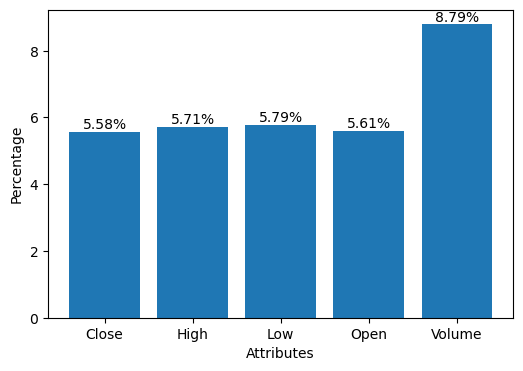

In [16]:
plt.figure(figsize = (6,4))
ax = plt.subplot()
ax.set_xlabel("Attributes")
ax.set_ylabel("Percentage")
ax.bar(outlier_df['Attributes'], outlier_df['Percentage'])

for i, val in enumerate(outlier_df['Percentage']):
    ax.text(i,val,f"{val:.2f}%", ha = 'center', va = 'bottom')

In [17]:
df1 = df.copy()
for col in columns:
    df1[col] = np.where(df1[col] > upper_val[col], upper_val[col],
                 np.where(df1[col] < lower_val[col],lower_val[col],
                         df1[col]))
# sns.boxplot(df1['Open'])
df1

,Close,High,Low,Open,Volume
0,2.484366,2.576470,2.375919,2.475947,300514455.0
1,2.681699,2.700763,2.488327,2.500954,300514455.0
2,2.708686,2.809705,2.700021,2.742112,300514455.0
3,2.596526,2.763156,2.564338,2.754243,300514455.0
4,2.624504,2.674023,2.572014,2.598754,184645512.0
...,...,...,...,...,...
5231,152.651560,153.674890,148.804247,151.696158,18508700.0
5232,152.651560,153.674890,148.804247,151.696158,25375400.0
5233,152.651560,153.674890,148.804247,151.696158,22258100.0
5234,152.651560,153.674890,148.804247,151.696158,18817600.0


# Train and split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
x2 = df1[['Open', 'High', 'Low', 'Volume']]
y2 = df1['Close']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [21]:
columns = ['Open', 'High','Low', 'Volume']

In [22]:
sample1 = pd.DataFrame([[2.773060606,2.644063305,2.660405128,217608605]],columns=columns)
sample2 = pd.DataFrame([[2.828274352,2.728493483,2.73740742,215279909]],columns=columns)
sample3 = pd.DataFrame([[3.010751549,2.891163535,2.89562003,213585582]],columns=columns)

# Multiple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [97]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [98]:
#prediction
pred1 = linear_model.predict(X_test)

#accuracy
score = r2_score(y_test,pred1)
mse = mean_squared_error(y_test,pred1)
print("R2 score : ",score)
print("MSE : ", mse)

a1 = linear_model.predict(sample1)
b1 = linear_model.predict(sample2)
c1 = linear_model.predict(sample3)
print(a1)
print(b1)
print(c1)

R2 score :  0.9999318955233921
MSE :  0.16683895614874175
[2.60326434]
[2.69891059]
[2.8459835]


In [35]:
comparison = {
    'Actual'    : y_test,
    'Predicted' : pred1
}
frame = pd.DataFrame(comparison)
frame = frame.reset_index()
frame

,index,Actual,Predicted
0,3075,37.881329,37.934132
1,1268,11.284375,11.429859
2,422,10.906548,10.942665
3,2543,28.504835,28.612565
4,2842,37.893753,38.102244
...,...,...,...
1043,3142,40.443100,40.446707
1044,859,14.875242,15.006452
1045,3116,39.112507,39.124125
1046,2231,21.983438,22.058785


# Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [319]:
forest_regression = RandomForestRegressor()
forest_regression.fit(X_train,y_train)

RandomForestRegressor()

In [320]:
pred2 = forest_regression.predict(X_test)
pred2

array([37.80233284, 11.47505133, 10.92374203, ..., 39.07018162,
       21.99890755,  9.07369431])

In [321]:
# accuracy

score2 = r2_score(y_test, pred2)
mse1 = mean_squared_error(y_test,pred2)
print("R2 score : ",score2)
print("MSE : ", mse1)

a2 = forest_regression.predict(sample1)
b2 = forest_regression.predict(sample2)
c2 = forest_regression.predict(sample3)
print(a2)
print(b2)
print(c2)

R2 score :  0.9999029480583468
MSE :  0.21399328250385144
[2.66155872]
[2.75538483]
[2.95085108]


# Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [315]:
X_train, X_test, y_train, y_test = train_test_split(x2,y2, test_size = 0.2, random_state = 42)

In [210]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [211]:
# prediction
pred3 = tree_regressor.predict(X_test)

# accuracy

score3 = r2_score(y_test,pred3)
mse3 = mean_squared_error(y_test,pred3)
print("R2 score : ",score3)
print("MSE : ", mse3)

a3 = tree_regressor.predict(sample1)
b3 = tree_regressor.predict(sample2)
c3 = tree_regressor.predict(sample3)
print(a3)
print(b3)
print(c3)

R2 score :  0.999834039892943
MSE :  0.3659313504587495
[2.62450361]
[2.77306056]
[3.14098668]


# Support Vector Regressor

In [213]:
from sklearn.svm import SVR

In [214]:
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
x2 = df1[['Open', 'High', 'Low', 'Volume']]
y2 = df1['Close']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [249]:
svr = SVR(kernel='rbf', C=100, epsilon=0.5)
svr.fit(X_train, y_train)

SVR(C=100, epsilon=0.5)

In [250]:
# prediction
pred4 = svr.predict(X_test)
# accuracy

score4 = r2_score(y_test,pred4)
mse4 = mean_squared_error(y_test,pred4)
print("R2 score : ",score4)
print("MSE : ", mse4)

a4 = svr.predict(sample1)
b4 = svr.predict(sample2)
c4 = svr.predict(sample3)
print(a4)
print(b4)
print(c4)

R2 score :  0.5575311092514601
MSE :  1083.9382598274824
[10.70644504]
[10.88050015]
[11.01043139]


# kNN Regressor

In [148]:
from sklearn.neighbors import KNeighborsRegressor

In [289]:
X_train, X_test, y_train, y_test = train_test_split(x2,y2, test_size = 0.2, random_state = 42)

In [290]:
print(4188**0.5)

64.71475874945375


In [309]:
kNN = KNeighborsRegressor(n_neighbors=65)
                         
kNN.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=65)

In [310]:
# prediction

pred5 = kNN.predict(X_test)

#accuracy

score5 = r2_score(y_test,pred5)
mse5 = mean_squared_error(y_test, pred5)
print("R2 score : ",score5)
print("MSE : ", mse5)

a5 = kNN.predict(sample1)
b5 = kNN.predict(sample2)
c5 = kNN.predict(sample3)
print(a5)
print(b5)
print(c5)

R2 score :  0.6017455689026484
MSE :  878.1253783329959
[11.11091287]
[11.35786764]
[10.87120128]


In [311]:
df_table = pd.DataFrame({
    'Algorithm'  : ['Multiple Linear Regression','RandomForestRegressor','DecisionTreeRegressor','SupportVectorRegressor', 'kNNRegressor'],
    'Accuracy'   : [0.99, 0.99, 0.99, 0.55,0.60],
    'Input1'     : [[2.773060606,2.644063305,2.660405128,217608605],[2.773060606,2.644063305,2.660405128,217608605],
                    [2.773060606,2.644063305,2.660405128,217608605],[2.773060606,2.644063305,2.660405128,217608605],
                   [2.773060606,2.644063305,2.660405128,217608605]],
    'Actual1'    : [2.760433674,2.760433674,2.760433674,2.760433674,2.760433674],
    'Predicted1' : [2.60326434,2.65415564,2.62450361,10.70644504,11.11091287],
    
    'Input2'     : [[2.828274352,2.728493483,2.73740742,215279909],[2.828274352,2.728493483,2.73740742,215279909],
                    [2.828274352,2.728493483,2.73740742,215279909],[2.828274352,2.728493483,2.73740742,215279909],
                   [2.828274352,2.728493483,2.73740742,215279909]],
    'Actual2'    : [2.77306056,2.77306056,2.77306056,2.77306056,2.77306056],
    'Predicted2' : [2.69891059,2.7601832,2.77306056,10.88050015,11.35786764],
    
    'Input3'     : [[3.010751549,2.891163535,2.89562003,213585582],[3.010751549,2.891163535,2.89562003,213585582],
                    [3.010751549,2.891163535,2.89562003,213585582],[3.010751549,2.891163535,2.89562003,213585582],
                    [3.010751549,2.891163535,2.89562003,213585582]],
    'Actual3'    : [2.955290318,2.955290318,2.955290318,2.955290318,2.955290318],
    'Predicted3' : [2.8459835,2.95531275,3.14098668,11.01043139,10.87120128],
})
df_table

,Algorithm,Accuracy,Input1,Actual1,Predicted1,Input2,Actual2,Predicted2,Input3,Actual3,Predicted3
0,Multiple Linear Regression,0.99,"[2.773060606, 2.644063305, 2.660405128, 217608...",2.760434,2.603264,"[2.828274352, 2.728493483, 2.73740742, 215279909]",2.773061,2.698911,"[3.010751549, 2.891163535, 2.89562003, 213585582]",2.95529,2.845983
1,RandomForestRegressor,0.99,"[2.773060606, 2.644063305, 2.660405128, 217608...",2.760434,2.654156,"[2.828274352, 2.728493483, 2.73740742, 215279909]",2.773061,2.760183,"[3.010751549, 2.891163535, 2.89562003, 213585582]",2.95529,2.955313
2,DecisionTreeRegressor,0.99,"[2.773060606, 2.644063305, 2.660405128, 217608...",2.760434,2.624504,"[2.828274352, 2.728493483, 2.73740742, 215279909]",2.773061,2.773061,"[3.010751549, 2.891163535, 2.89562003, 213585582]",2.95529,3.140987
3,SupportVectorRegressor,0.55,"[2.773060606, 2.644063305, 2.660405128, 217608...",2.760434,10.706445,"[2.828274352, 2.728493483, 2.73740742, 215279909]",2.773061,10.880500,"[3.010751549, 2.891163535, 2.89562003, 213585582]",2.95529,11.010431
4,kNNRegressor,0.60,"[2.773060606, 2.644063305, 2.660405128, 217608...",2.760434,11.110913,"[2.828274352, 2.728493483, 2.73740742, 215279909]",2.773061,11.357868,"[3.010751549, 2.891163535, 2.89562003, 213585582]",2.95529,10.871201


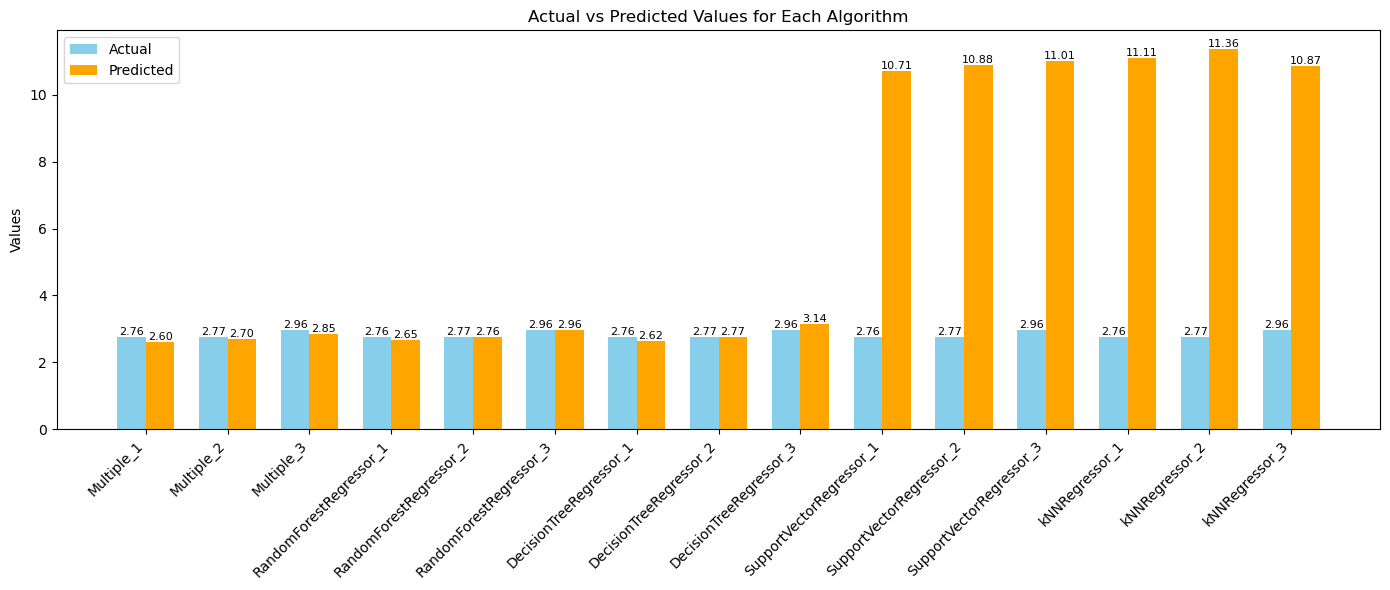

In [314]:
labels = []
actual_values = []
predicted_values = []

for index, row in df_table.iterrows():
    algo = row['Algorithm']
    for i in range(1, 4):
        labels.append(f"{algo.split()[0]}_{i}")  # Shortened label like MLR_1
        actual_values.append(row[f'Actual{i}'])
        predicted_values.append(row[f'Predicted{i}'])

# Bar plot
x = np.arange(len(labels))  # X-axis positions
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(x - width/2, actual_values, width, label='Actual', color='skyblue')
bar2 = ax.bar(x + width/2, predicted_values, width, label='Predicted', color='orange')

def add_labels(bars, values):
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'{val:.2f}',        # format as needed
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=0
        )

add_labels(bar1, actual_values)
add_labels(bar2, predicted_values)

# Labeling
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values for Each Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

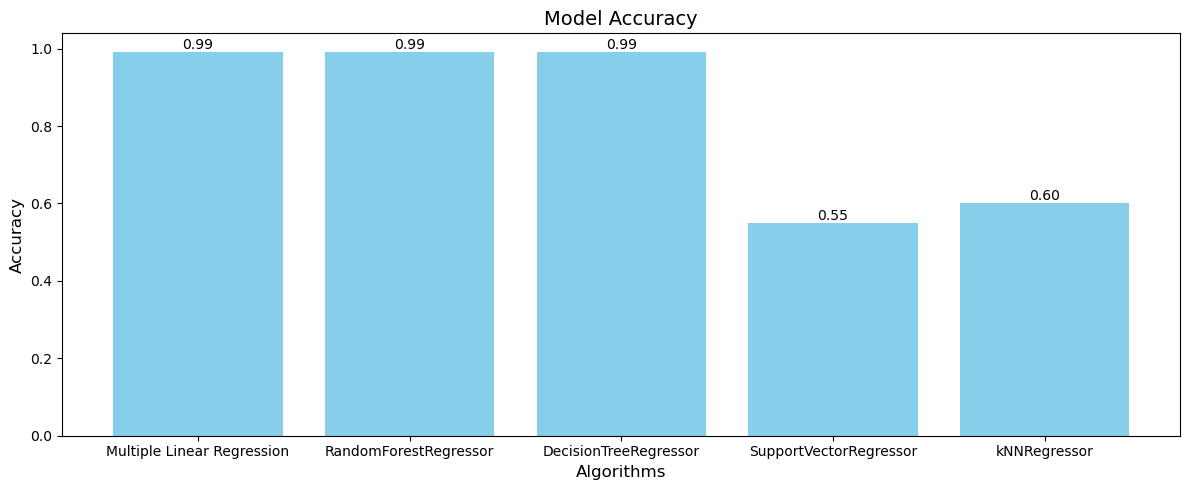

In [313]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 5))
plt.figure(figsize = (12,5))
ax = plt.subplot()
ax.bar(df_table['Algorithm'], df_table['Accuracy'], color='skyblue')

for i, val in enumerate(df_table['Accuracy']):
    ax.text(i, val, f"{val:.2f}", ha='center', va='bottom' , fontsize=10)

ax.set_title("Model Accuracy", fontsize=14)
ax.set_xlabel("Algorithms", fontsize = 12)
ax.set_ylabel("Accuracy", fontsize = 12)
plt.tight_layout()
plt.show()